In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt


conn = psycopg2.connect(
    host="localhost",
    database="superstore",
    user="postgres",
    password="1202"
)

query = "SELECT * FROM superstore;"
df = pd.read_sql(query, conn)

df.head()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly_sales = (
    df.groupby(df['Order Date'].dt.to_period('M'))['Sales']
    .sum()
)

monthly_sales.plot(figsize=(10,5), title="Monthly Sales Trend")


Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64


<Axes: title={'center': 'Sales by Region'}, ylabel='Region'>

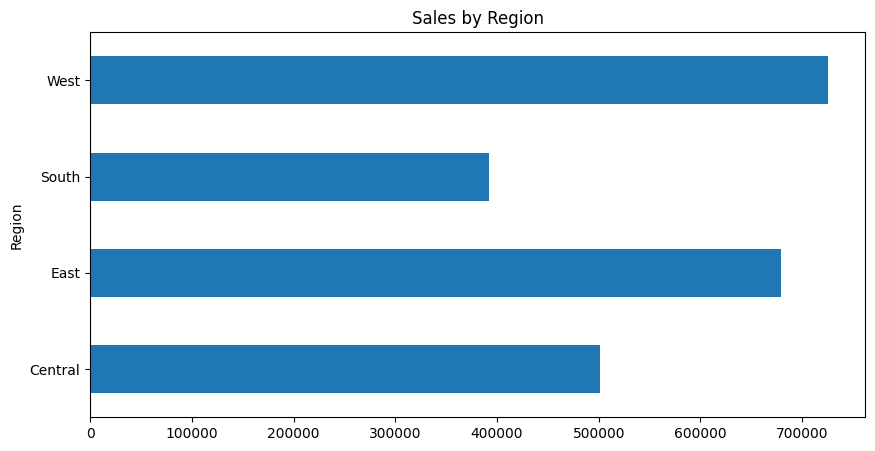

In [9]:
regional_sales = df.groupby('Region')['Sales'].sum()
print(regional_sales)
regional_sales.plot(kind='barh', figsize=(10,5), title="Sales by Region")

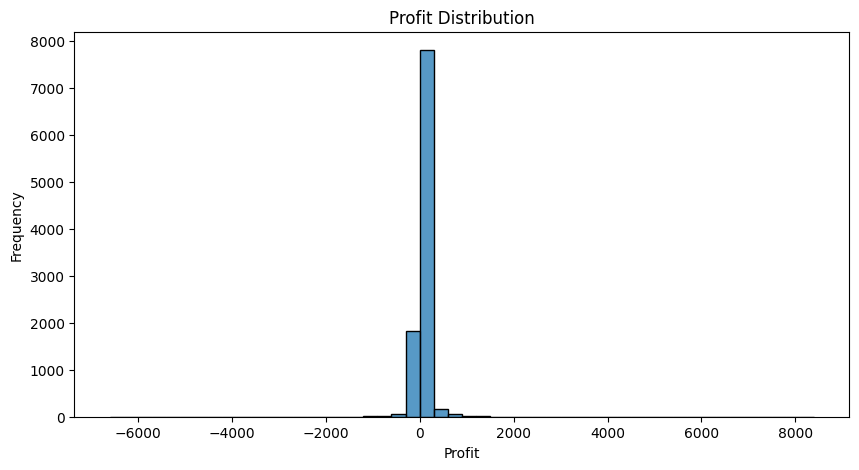

In [11]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Profit'], bins=50)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()


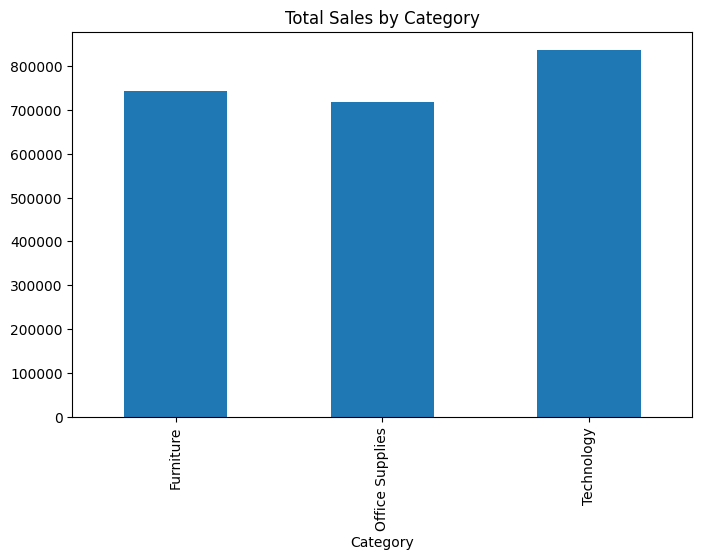

In [8]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title("Total Sales by Category")
plt.show()


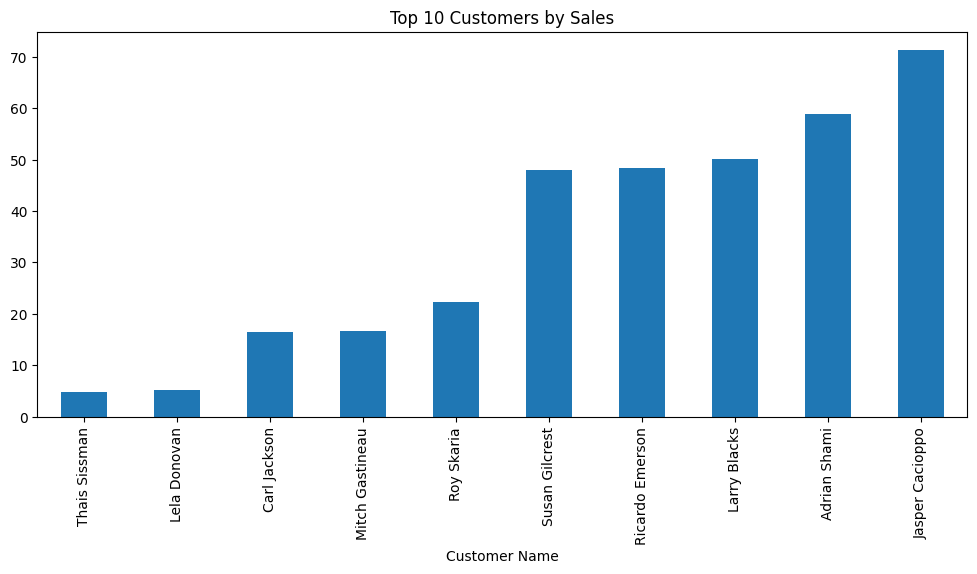

In [ ]:
top_customers = (
    df.groupby('Customer Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,5))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Sales")
plt.show()
